# Data analysis

In this section we will check how good the data is, by subjecting it to different processes.

**The goal of the whole project is to predict the next year's playoff variable (Y/N) in the teams table for the next year.** 

## Selected data

From the domain analysis we have decided to focus on these attributes:

- teams.csv
  - year
  - tmID
  - playoff
  - name
  - won
  - lost
  - GP - games played
  - o_fgm - field goals made
  - o_fga - fieal goals attempted
  - o_ftm - free throws made
  - o_fta - free throws attempted
  - o_3pm - three points made
  - o_3pa - three pointes attempted
  - o_oreb - offensive rebounds
  - o_dreb - defensive rebounds
  - o_reb - rebounds
  - o_asts - assists
  - o_pf - personal fouls
  - o_stl - steals
  - o_to - turnovers
  - o_blk - blocks
  - o_pts - points
  - d_fgm
  - d_fga
  - d_ftm
  - d_fta
  - d_3pm
  - d_3pa
  - d_oreb
  - d_dreb
  - d_reb
  - d_asts
  - d_pf
  - d_stl
  - d_to
  - d_blk
  - d_pts
- teams_post.csv ❌
- series_post.csv ❌
- awards_players.csv
  - playerID
  - award
  - year
- coaches.csv
  - coachID
  - year
  - tmID
  - stint
  - won
  - lost
- players.csv
  - bioID
  - pos
  - height?
- players_teams.csv 
  - playerID
  - year
  - tmID
  - minutes
  - points
  - oRebounds
  - dRebounds
  - oRebounds
  - dRebounds 
  - rebounds 
  - assists 
  - steals
  - blocks
  - turnovers 
  - PF
  - fgAttempted 
  - fgMade 
  - ftAttempted 
  - ftMade 
  - threeAttempted 
  - threeMade 



In [28]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [29]:
# Define chosen attributes
teams_attributes = ["year", "tmID", "playoff",  "name", "won", "lost", "GP", "o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts"]
coaches_attributes = ["coachID", "year", "tmID", "stint", "won", "lost"]
players_attributes = ["bioID", "pos", "height"]
players_teams_attributes = ["playerID","year","tmID","minutes","points","oRebounds","dRebounds","oRebounds","dRebounds", "rebounds", "assists", "steals","blocks","turnovers", "PF","fgAttempted", "fgMade", "ftAttempted", "ftMade", "threeAttempted", "threeMade"]
awards_players_attributes = ["playerID", "award", "year"]

# Define the datasets
df_teams = pd.read_csv("./datasets/original/teams.csv")
df_coaches = pd.read_csv("./datasets/original/coaches.csv")
df_players = pd.read_csv("./datasets/original/players.csv")
df_players_teams = pd.read_csv("./datasets/original/players_teams.csv")
df_awards_players = pd.read_csv("./datasets/original/awards_players.csv")

## Teams table analysis

[Text(0.4727272727272727, 0.9807692307692307, 'attend <= 144875.5\ngini = 0.492\nsamples = 142\nvalue = [62, 80]'),
 Text(0.26590909090909093, 0.9423076923076923, 'attend <= 100243.5\ngini = 0.497\nsamples = 95\nvalue = [51, 44]'),
 Text(0.24772727272727274, 0.9038461538461539, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2840909090909091, 0.9038461538461539, 'attend <= 142584.5\ngini = 0.5\nsamples = 87\nvalue = [43, 44]'),
 Text(0.26590909090909093, 0.8653846153846154, 'attend <= 117224.0\ngini = 0.497\nsamples = 82\nvalue = [38, 44]'),
 Text(0.09090909090909091, 0.8269230769230769, 'attend <= 106806.0\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.05454545454545454, 0.7884615384615384, 'attend <= 104223.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.03636363636363636, 0.75, 'attend <= 102937.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01818181818181818, 0.7115384615384616, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05454545454545454, 0.7115

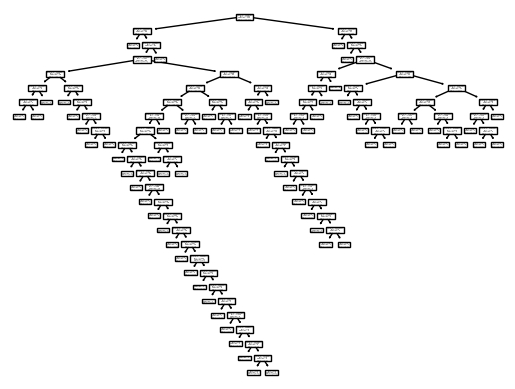

In [7]:
features=["attend"]
X = df_teams[features]
y = df_teams['playoff']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features) 

# Split dataset into training set and test set





In [8]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
#trainmask=df_teams[df_teams["year"]>3] #train
#testmask=df_teams[df_teams["year"]<=3] #test

X_train=df_teams[df_teams["year"]>3][features]
X_test=df_teams[df_teams["year"]<=3][features]
y_train=df_teams[df_teams["year"]>3]["playoff"]
y_test=df_teams[df_teams["year"]<=3]["playoff"]

#use latest years for training and leave older years for testing
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#add other stuff indexex, confusion matrix for exmaple


Accuracy: 0.4583333333333333


In [9]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


In [10]:
conf_matrix #70 to 30% random #acc78??? ifk

array([[13, 11],
       [15,  9]], dtype=int64)

In [11]:
conf_matrix # train is over 3 #acc 91

array([[13, 11],
       [15,  9]], dtype=int64)

In [12]:
conf_matrix #train is over 4 #acc 80

array([[13, 11],
       [15,  9]], dtype=int64)

## Players table analysis

### Missing values

Some players have a lot of missing values and we assume they are totally wrong.


In [90]:
df_players.head()

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190,George Washington,NaN,1975-09-27,0000-00-00
1,abrossv01w,F,0,0,74.0,169,Connecticut,NaN,1980-07-09,0000-00-00
2,adairje01w,C,0,0,76.0,197,George Washington,NaN,1986-12-19,0000-00-00
3,adamsda01w,F-C,0,0,73.0,239,Texas A&M,Jefferson College (JC),1989-02-19,0000-00-00
4,adamsjo01w,C,0,0,75.0,180,New Mexico,NaN,1981-05-24,0000-00-00


The first thing to do is to change all empty values we have into N/A values, since the built in Pandas method doesn't detect strings and numbers as N/A.

In [31]:
# reinitialize dataframe so we can leave the old one untouched for some analysis
df_players_nan = df_players

df_players_nan.loc[df_players_nan["birthDate"] == "0000-00-00", "birthDate"] = np.nan 
df_players_nan.loc[df_players_nan["deathDate"] == "0000-00-00", "deathDate"] = np.nan 
df_players_nan.loc[df_players_nan["pos"] == "", "pos"] = np.nan 
df_players_nan.loc[df_players_nan["weight"] == 0, "weight"] = np.nan 
df_players_nan.loc[df_players_nan["height"] == 0, "height"] = np.nan 

df_players_nan.head(5)

,bioID,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,deathDate
0,abrahta01w,C,0,0,74.0,190.0,George Washington,NaN,1975-09-27,NaN
1,abrossv01w,F,0,0,74.0,169.0,Connecticut,NaN,1980-07-09,NaN
2,adairje01w,C,0,0,76.0,197.0,George Washington,NaN,1986-12-19,NaN
3,adamsda01w,F-C,0,0,73.0,239.0,Texas A&M,Jefferson College (JC),1989-02-19,NaN
4,adamsjo01w,C,0,0,75.0,180.0,New Mexico,NaN,1981-05-24,NaN


Now we can actually correctly count the empty values.

In [32]:
df_players_nan.isna().sum()

bioID             0
pos              78
firstseason       0
lastseason        0
height           80
weight          119
college         167
collegeOther    882
birthDate        84
deathDate       889
dtype: int64

As we can see from the previous numbers, we have many empty instances of different attributes. From these attributes we will disregard most of them since we are using only some, however the problematic ones are those where the whole row is incorrect. 

Most of the incorrect rows have multiple missing values, usually those are the ones that have pos, weight, height and birthDate set as N/A.

However, there are some correct players that do not have a birthDate or pos.

### Outliers

Although we can check for some outliers in height, weight etc., none of the attributes we will be analyzing can have outliers since all are textual data.

<AxesSubplot: ylabel='height'>

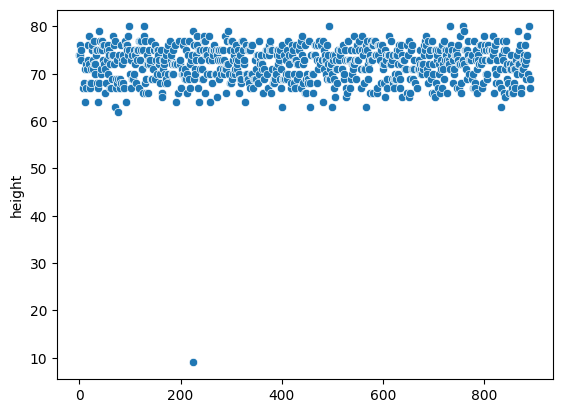

In [96]:
sns.scatterplot(data=df_players["height"])

<AxesSubplot: xlabel='pos', ylabel='Count'>

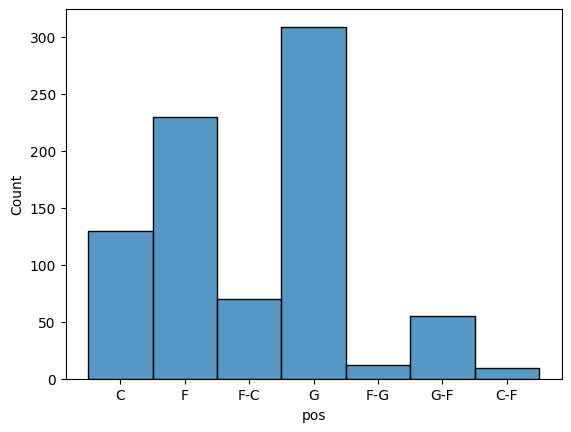

In [4]:
sns.histplot(df_players["pos"])

### Inconsistent data

We have noticed only 1 major inconsistency in the players.csv dataset, and that is the incorrect usage of pos.

In [98]:
for i in df_players["pos"].unique():
  print(i)

C
F
F-C
nan
G
F-G
G-F
C-F


As we can see from the results, there are 2 positions which are the same but written differently:

- F-C and C-F
- F-G and G-F

## Coaches table analysis

### Missing values

There are no missing values in the coaches table.

In [101]:
df_coaches.isna().sum()

coachID        0
year           0
tmID           0
lgID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64

### Outliers

<AxesSubplot: xlabel='lost', ylabel='Count'>

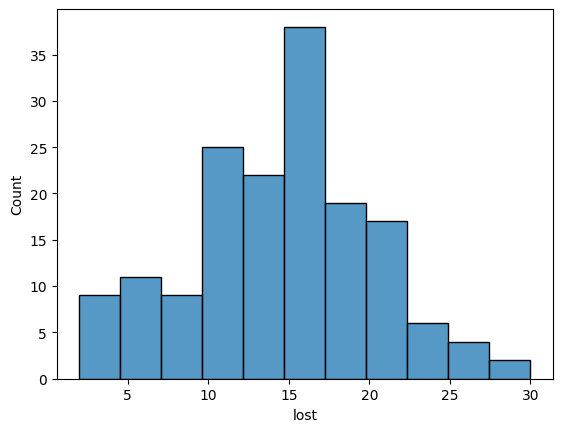

In [106]:
sns.histplot(df_coaches["lost"])

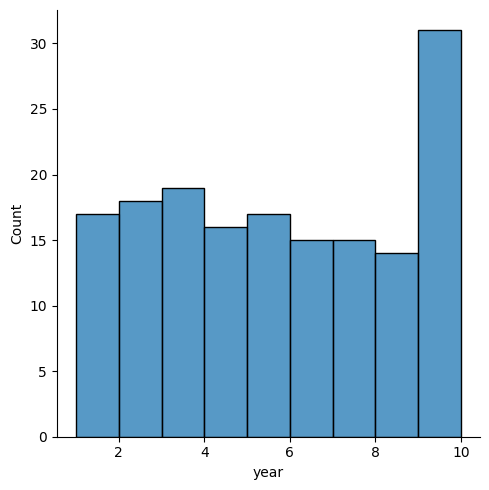

In [104]:
sns.displot(df_coaches["year"])

There are no noticable outliers for the coaches dataset.

### Inconsistent data

Although it may not be a problem, there is a huge difference between the total games coached, between some coaches.

<AxesSubplot: ylabel='Count'>

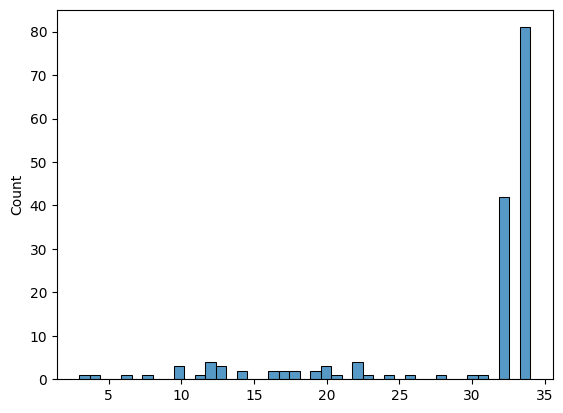

In [25]:
sns.histplot(df_coaches["won"] + df_coaches["lost"])